In [5]:
import pandas as pd

# Load and inspect iris.data
iris_data = pd.read_csv('iris.data', header=None)
print("iris.data preview:")
print(iris_data.head())

# Load and inspect bezdekIris.data
bezdek_iris_data = pd.read_csv('bezdekIris.data', header=None)
print("\nbezdekIris.data preview:")
print(bezdek_iris_data.head())

# Try to load Index file and iris.names if they are text files
try:
    with open('Index', 'r') as file:
        index_content = file.read()
    print("\nIndex file content:")
    print(index_content)
except Exception as e:
    print("\nFailed to read Index file:", str(e))

try:
    with open('iris.names', 'r') as file:
        names_content = file.read()
    print("\niris.names content:")
    print(names_content)
except Exception as e:
    print("\nFailed to read iris.names file:", str(e))


iris.data preview:
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

bezdekIris.data preview:
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

Index file content:
Index of iris

02 Dec 1996      105 Index
08 Mar 1993     4551 iris.data
30 May 1989     2604 iris.names


iris.names content:
1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual 

Activation Function: step, Accuracy: 1.0


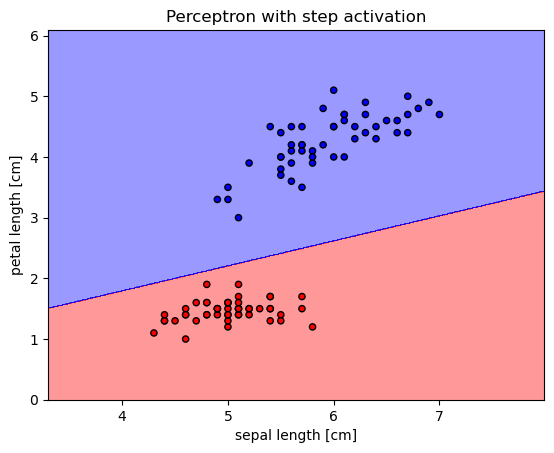

Activation Function: sigmoid, Accuracy: 1.0


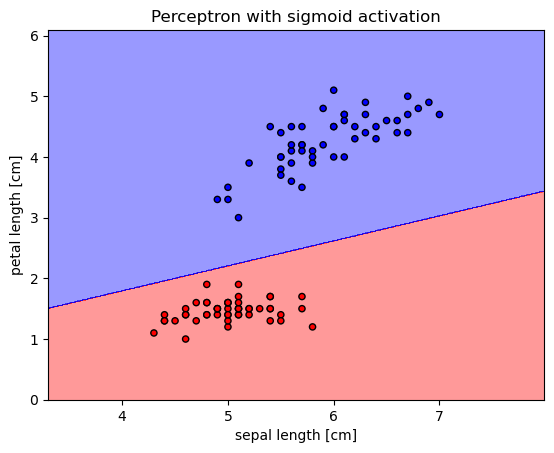

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron(object):
    def __init__(self, Learn_Rate=0.1, Iterations=6, activation='step'):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.activation = activation

    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        self.errors = []
        
        for _ in range(self.Iterations):
            error = 0
            for xi, target in zip(x, y):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]

    def predict(self, x):
        if self.activation == 'step':
            return np.where(self.net_input(x) >= 0.0, 1, -1)
        elif self.activation == 'sigmoid':
            return np.where(1 / (1 + np.exp(-self.net_input(x))) >= 0.5, 1, -1)
        

# Data retrieval and preparation
df = pd.read_csv('iris.data', header=None)  # Assuming iris.data is the correct path
x = df.iloc[0:100, [0, 2]].values  # Selecting first 100 samples and two features
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)  # Binary classification Iris-setosa or not

# Split the dataset into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Experiment with different activation functions
activation_functions = ['step', 'sigmoid']
for activation in activation_functions:
    classifier = Perceptron(Learn_Rate=0.1, Iterations=6, activation=activation)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Activation Function: {activation}, Accuracy: {accuracy}")

    # Plot decision regions
    cmap = ListedColormap(['#FF0000', '#0000FF'])
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, s=20, edgecolor='k')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(f'Perceptron with {activation} activation')
    plt.show()


Activation Function: step, Accuracy: 1.0


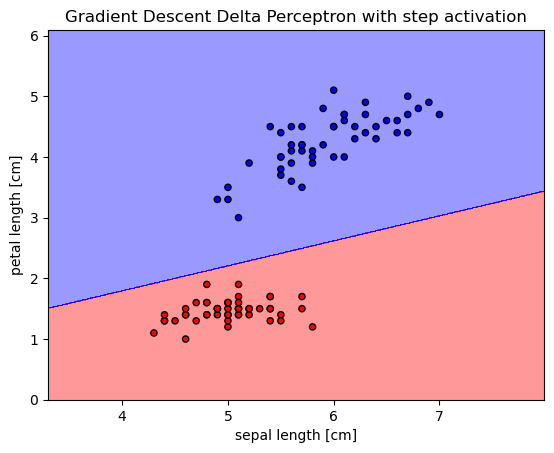

Activation Function: sigmoid, Accuracy: 1.0


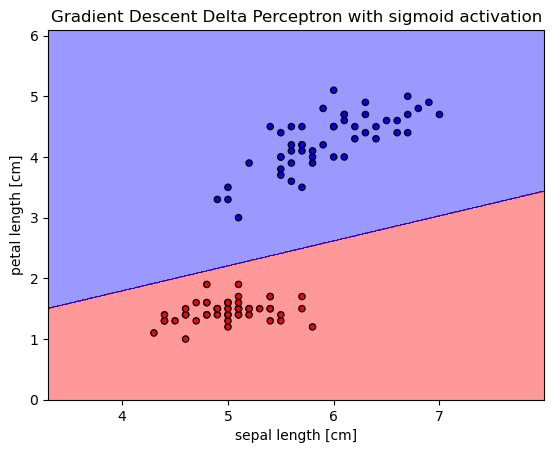

In [24]:
class GradientDescentDeltaPerceptron(object):
    def __init__(self, Learn_Rate=0.01, Iterations=50, activation='step'):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.activation = activation

    def fit(self, x, y):
        self.weights = np.zeros(1 + x.shape[1])
        self.errors = []
        
        for _ in range(self.Iterations):
            errors = []
            for xi, target in zip(x, y):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors.append(0.5 * (target - self.predict(xi))**2)
            self.errors.append(sum(errors))
        return self

    def net_input(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]

    def predict(self, x):
        if self.activation == 'step':
            return np.where(self.net_input(x) >= 0.0, 1, -1)
        elif self.activation == 'sigmoid':
            return np.where(1 / (1 + np.exp(-self.net_input(x))) >= 0.5, 1, -1)

# Data retrieval and preparation
df = pd.read_csv('iris.data', header=None)  # Assuming iris.data is the correct path
x = df.iloc[0:100, [0, 2]].values  # Selecting first 100 samples and two features
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)  # Binary classification Iris-setosa or not

# Split the dataset into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Experiment with different activation functions
activation_functions = ['step', 'sigmoid']
for activation in activation_functions:
    classifier = GradientDescentDeltaPerceptron(Learn_Rate=0.01, Iterations=50, activation=activation)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Activation Function: {activation}, Accuracy: {accuracy}")

    # Plot decision regions
    cmap = ListedColormap(['#FF0000', '#0000FF'])
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, s=20, edgecolor='k')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(f'Gradient Descent Delta Perceptron with {activation} activation')
    plt.show()


# Step 7: Answering Questions
# 1. Key Differences between Perceptron Learning Rule and Gradient Descent Delta Rule:
#    Perceptron Learning Rule updates weights based on the difference between predicted and actual outputs,
#    while Gradient Descent Delta Rule updates weights based on the derivative of the activation function.
#    Gradient Descent Delta Rule generally converges more smoothly and is applicable to a wider range of problems.
# 2. Impact of Activation Functions:
#    Activation functions determine the output range of a neuron. Different activation functions may lead to different convergence behaviors.
#    For example, using a step function in Perceptron Learning Rule may lead to slower convergence.
# 3. Strategies for Adjusting Learning Rate:
#    Learning rate adjustment is crucial for optimal model training. Techniques like learning rate decay or adaptive learning rates can be employed.
# 4. Implications of Dataset Splitting Ratios:
#    Using different ratios for splitting the dataset into training and testing sets can affect model evaluation and generalization.
#    A larger training set may lead to better model generalization but could result in overfitting if not balanced properly.
# 5. Challenges Encountered and Overcoming Them:
#    Challenges may include debugging the implementation, understanding algorithm convergence, and optimizing hyperparameters.
# 6. Strengths and Limitations of Each Algorithm:
#    Perceptron Learning Rule is simple and interpretable but may not converge for linearly inseparable data.
#    Gradient Descent Delta Rule is more versatile but may suffer from slow convergence for large datasets.
t stuck in local optima.